In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_excel('heart_disease.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


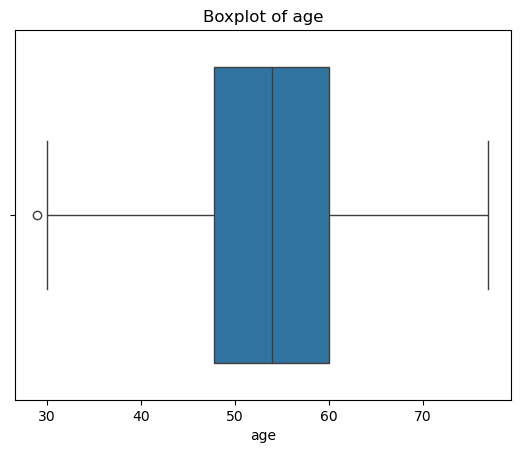

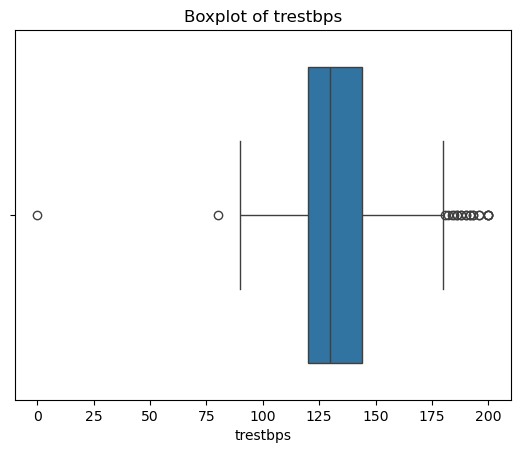

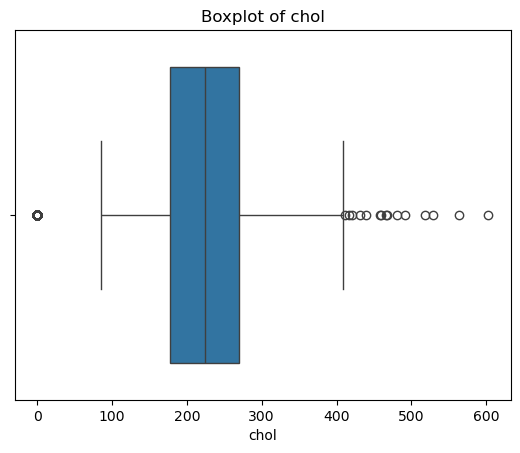

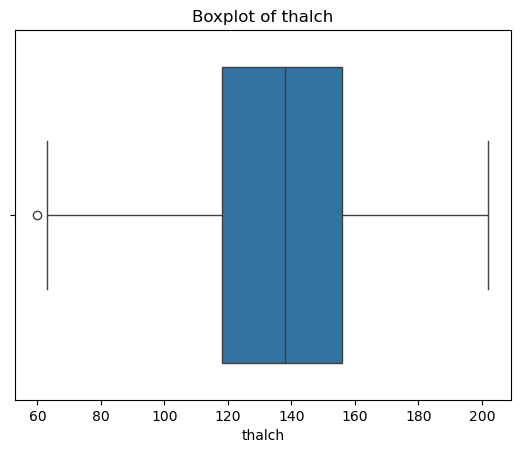

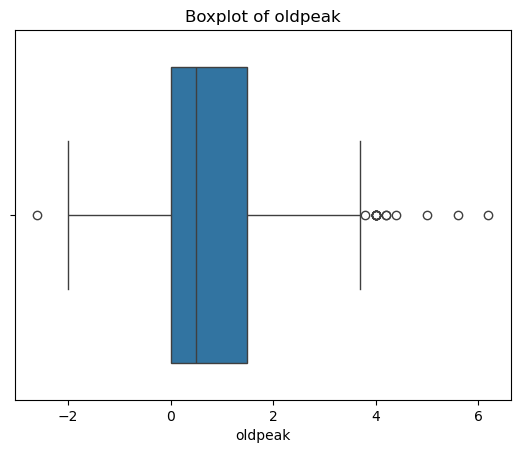

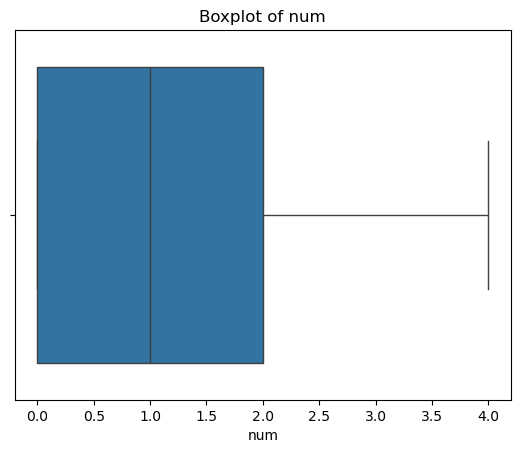

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers using box plots
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



In [6]:
# Check for inconsistencies (e.g., unique values in categorical columns)
categorical_features = df.select_dtypes(include=['category', 'object', 'bool'])
for col in categorical_features.columns:
    print(f'Unique values in {col}: {df[col].unique()}')



Unique values in sex: ['Male' 'Female']
Unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in fbs: [ True False]
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang: [False True 'FALSE' 'TURE']
Unique values in slope: ['downsloping' 'flat' 'upsloping']
Unique values in thal: ['fixed defect' 'normal' 'reversable defect']


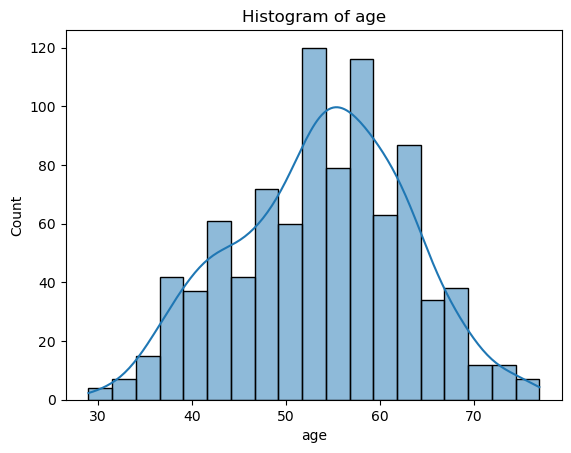

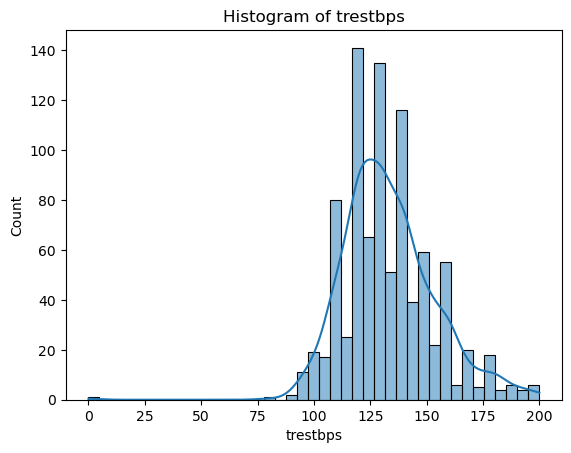

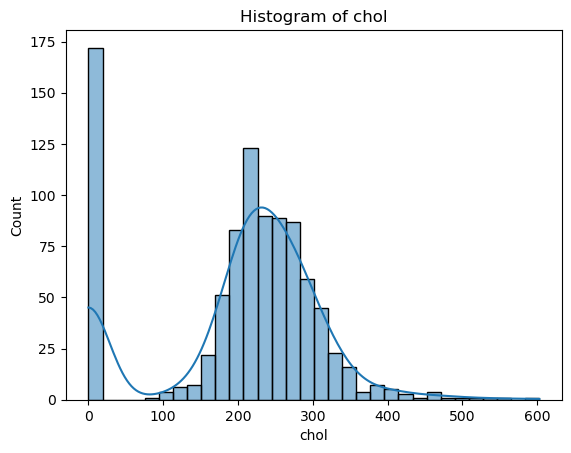

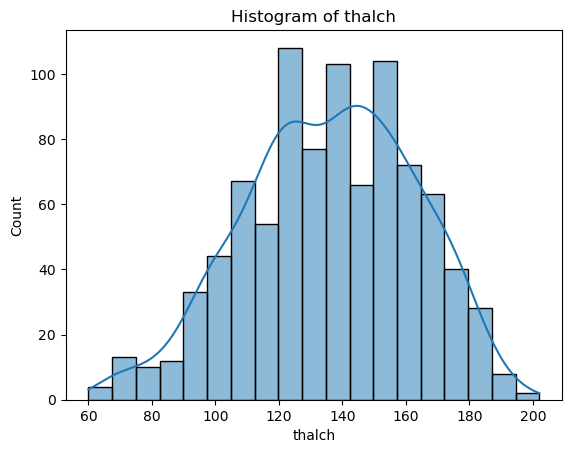

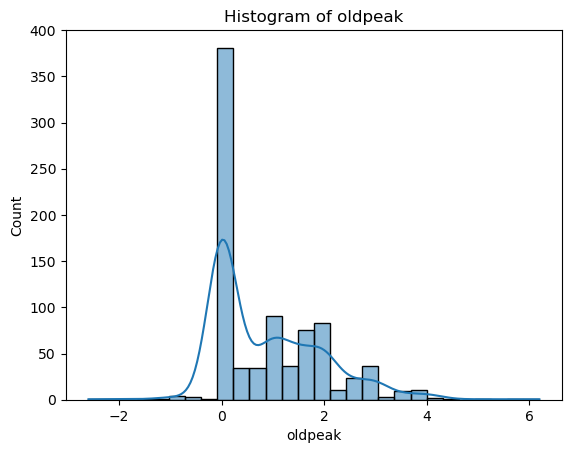

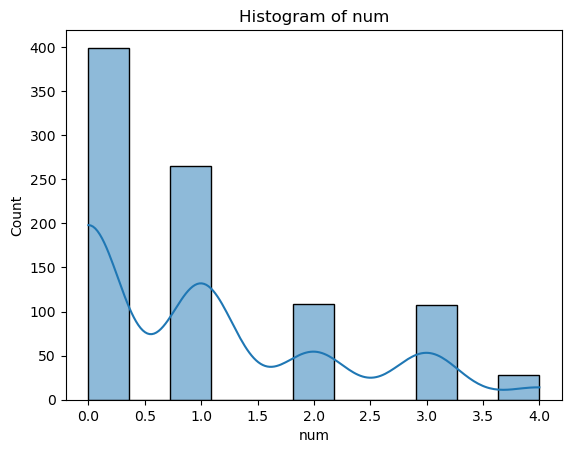

In [7]:
# Visualize the distribution of numerical features using histograms
for col in numerical_features.columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



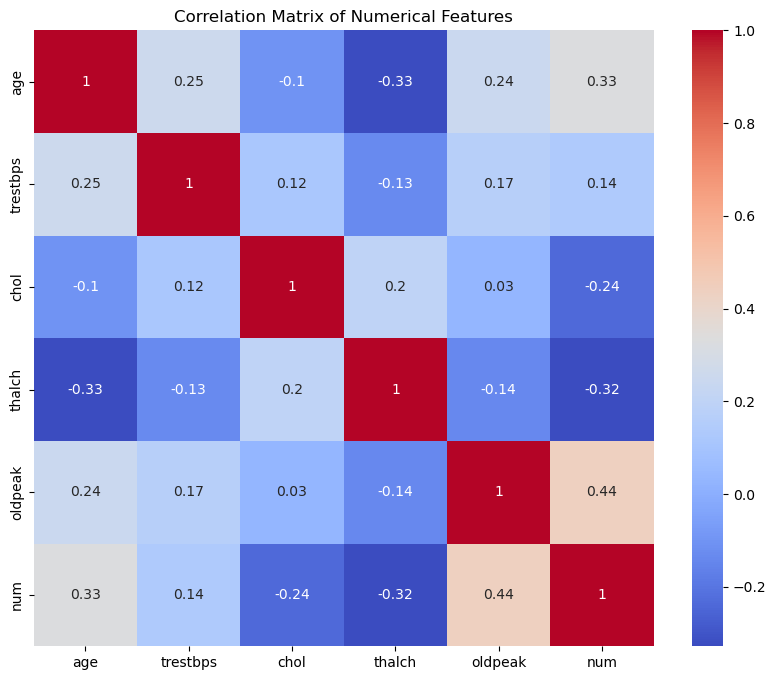

In [8]:
# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Feature Engineering
# Encode categorical features (if any)
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        # Convert mixed type columns to string before encoding
        df[column] = df[column].astype(str)  # Convert all values to strings
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Handle missing values (if any - already checked in previous code)
# Example: Fill numerical missing values with the mean
for col in numerical_features.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)



In [25]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features (X) and target (y)
X = df.drop('num', axis=1)  # Assuming 'num' is the column name for the target variable
# Convert the target variable to discrete values if it's continuous
y = pd.cut(df['num'], bins=2, labels=[0, 1])  # Example: Discretize into 2 bins


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Decision Tree Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))



Accuracy: 0.8076923076923077
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       159
           1       0.25      0.26      0.26        23

    accuracy                           0.81       182
   macro avg       0.57      0.57      0.57       182
weighted avg       0.81      0.81      0.81       182



In [27]:
# ROC AUC Score
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")




ROC AUC: 0.57383100902379


In [28]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best Score: 0.8526027397260274


In [29]:
# Evaluate the best model
best_dt_classifier = grid_search.best_estimator_
y_pred_best = best_dt_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy}")
print(classification_report(y_test,y_pred_best))



Best Model Accuracy: 0.8406593406593407
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       159
           1       0.12      0.04      0.06        23

    accuracy                           0.84       182
   macro avg       0.50      0.50      0.49       182
weighted avg       0.78      0.84      0.81       182



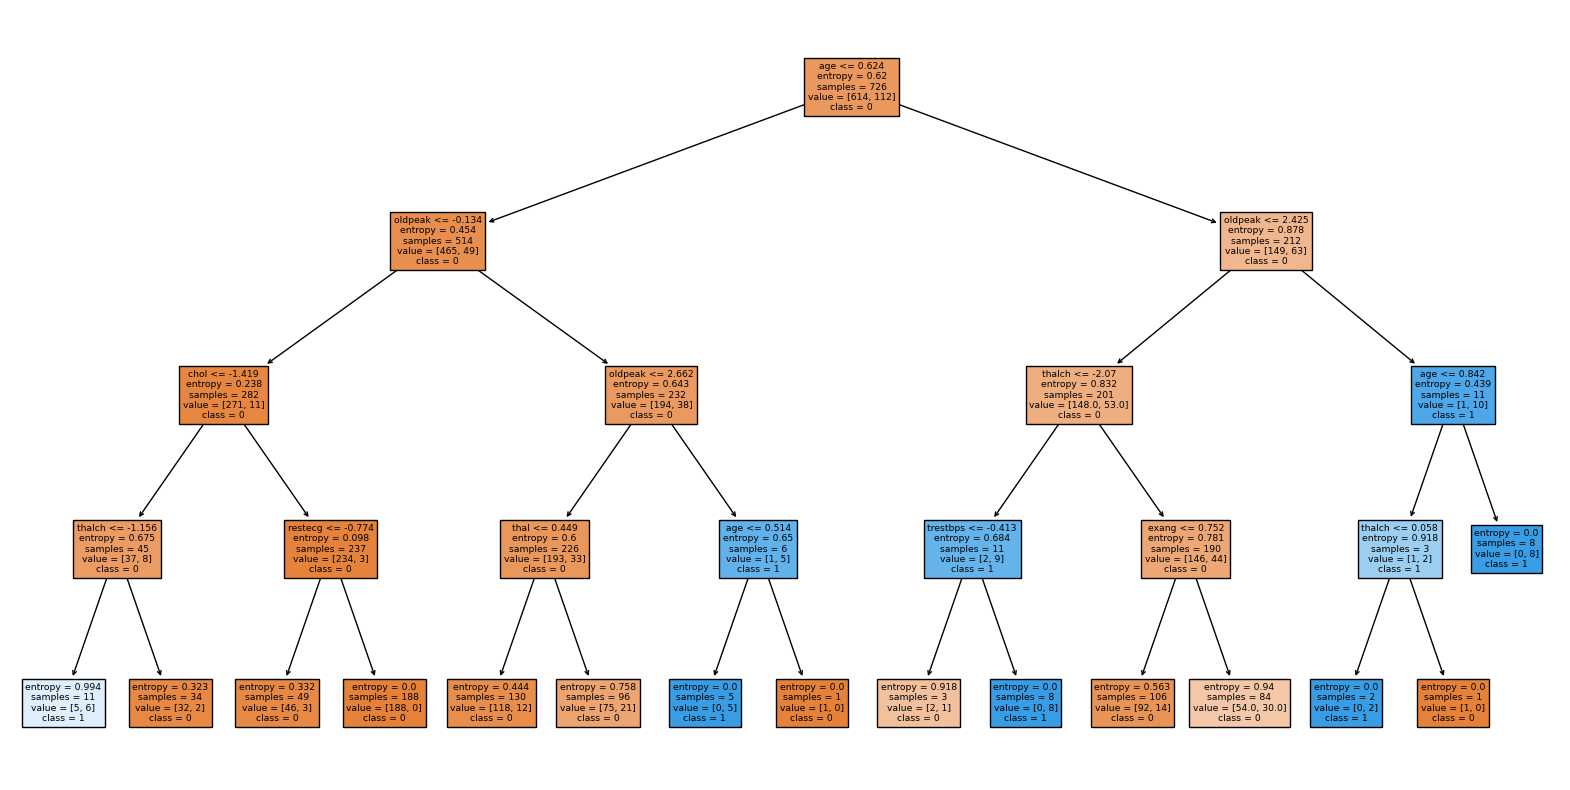

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [1]:
# Interview Questions
print("1. Common hyperparameters of decision tree models and their effects:")
print("- max_depth: Limits the depth of the tree to prevent overfitting.")
print("- min_samples_split: The minimum number of samples required to split a node. Higher values reduce overfitting.")
print("- min_samples_leaf: The minimum number of samples in a leaf node. Higher values smooth the model.")
print("- criterion: The function to measure the quality of a split (e.g., 'gini' or 'entropy').")
print("****************************************************************************")
print("2. Difference between Label Encoding and One-Hot Encoding:")
print("- Label Encoding: Assigns a unique integer to each category. Useful for ordinal data but can mislead algorithms with non-ordinal categorical data.")
print("- One-Hot Encoding: Creates binary columns for each category, ensuring no ordinal relationship is implied. Useful for nominal data.")

1. Common hyperparameters of decision tree models and their effects:
- max_depth: Limits the depth of the tree to prevent overfitting.
- min_samples_split: The minimum number of samples required to split a node. Higher values reduce overfitting.
- min_samples_leaf: The minimum number of samples in a leaf node. Higher values smooth the model.
- criterion: The function to measure the quality of a split (e.g., 'gini' or 'entropy').
****************************************************************************
2. Difference between Label Encoding and One-Hot Encoding:
- Label Encoding: Assigns a unique integer to each category. Useful for ordinal data but can mislead algorithms with non-ordinal categorical data.
- One-Hot Encoding: Creates binary columns for each category, ensuring no ordinal relationship is implied. Useful for nominal data.
